# Feature Engineering

## Objective

Create minimal,reusable time-based features to support trend analysis and forecasting, without over-engineering the dataset.


### Load Dataset

In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt

market_df = pd.read_csv(r'C:\Users\sande\OneDrive\Documents\Data science AI&ML\Projects\Projects for Resume\Stock Market Analysis & Forecasting- Project\Data\processed\market_data.csv')
market_df.head()

,date,reliance_open,reliance_high,reliance_low,reliance_close,reliance_volume,nifty_open,nifty_high,nifty_low,nifty_close,nifty_volume,reliance_return,nifty_return
0,2021-01-04,904.640696,906.363699,892.352703,902.713623,24513534,14104.34961,14147.95020,13953.75000,14132.90039,495000,0.001686,0.008161
1,2021-01-05,892.806130,899.426244,886.911511,891.491211,24123091,14075.15039,14215.59961,14048.15039,14199.50000,492500,-0.012432,0.004712
2,2021-01-06,891.400457,891.445793,863.854552,867.980774,46401468,14240.95020,14244.15039,14039.90039,14146.25000,632300,-0.026372,-0.003750
3,2021-01-07,870.814696,881.923778,863.854564,866.575134,32325918,14253.75000,14256.25000,14123.09961,14137.34961,559200,-0.001619,-0.000629
4,2021-01-08,869.681241,878.931255,867.006006,876.800110,27540187,14258.40039,14367.29980,14221.65039,14347.25000,613500,0.011799,0.014847


### Rolling Moving Average

* Moving averages help identify underlying trends by reducing short-term noise

In [4]:
market_df['reliance_ma_30'] = market_df['reliance_close'].rolling(30).mean()
market_df['nifty_ma_30'] = market_df['nifty_close'].rolling(30).mean()


In [5]:
market_df[['reliance_close','reliance_ma_30']].tail()

,reliance_close,reliance_ma_30
1233,1539.800049,1548.330001
1234,1570.400024,1550.030001
1235,1575.599976,1551.919999
1236,1592.300049,1553.360002
1237,1580.699951,1554.496667


### Cumulative max & drawdown

In [6]:
market_df['reliance_cum_max'] = market_df['reliance_close'].cummax()


In [8]:
market_df['reliance_drawdown'] = (market_df['reliance_close'] - market_df['reliance_cum_max']) / market_df['reliance_cum_max']

In [9]:
market_df[['reliance_cum_max','reliance_drawdown']].describe()

,reliance_cum_max,reliance_drawdown
count,1238.000000,1238.000000
mean,1349.565458,-0.092201
std,199.407007,0.061817
min,902.713623,-0.271757
25%,1243.024536,-0.131209
50%,1283.065674,-0.087185
75%,1589.138062,-0.042768
max,1592.300049,0.000000


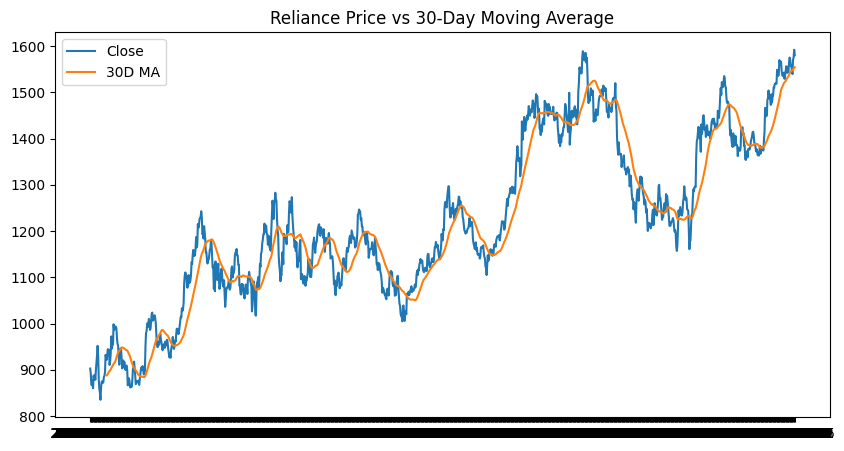

In [10]:
plt.figure(figsize=(10,5))
plt.plot(market_df["date"], market_df["reliance_close"], label="Close")
plt.plot(market_df["date"], market_df["reliance_ma_30"], label="30D MA")
plt.legend()
plt.title("Reliance Price vs 30-Day Moving Average")
plt.show()


The 30-day moving average smooths short-term price fluctuations and highlights
the underlying trend in Reliance stock. Periods where the price remains above
the moving average indicate sustained bullish momentum, while crossings below
the moving average signal temporary corrections.
